In [1]:
import pandas as pd
import numpy as np

# 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [2]:
df = pd.read_csv(r"C:\Users\bajpaig\Desktop\Great learning\Project 7 - recommendation\ratings_Electronics.csv" , sep = "," , names = ["userID", "productID", "ratings", "timestamp"])

In [3]:
df.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
df.describe()

,ratings,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [5]:
rdf = df.drop(["timestamp"], axis =1)

In [6]:
rdf.head()

,userID,productID,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
rdf.shape

(7824482, 3)

In [ ]:
#finding missing values

In [8]:
rdf.isna().sum()


userID       0
productID    0
ratings      0
dtype: int64

In [ ]:
#Plotting histograms

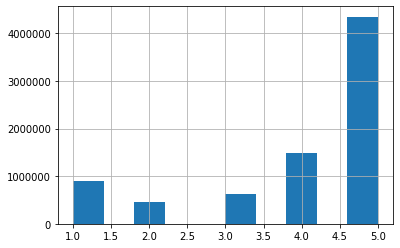

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
rdf['ratings'].hist(bins=10)

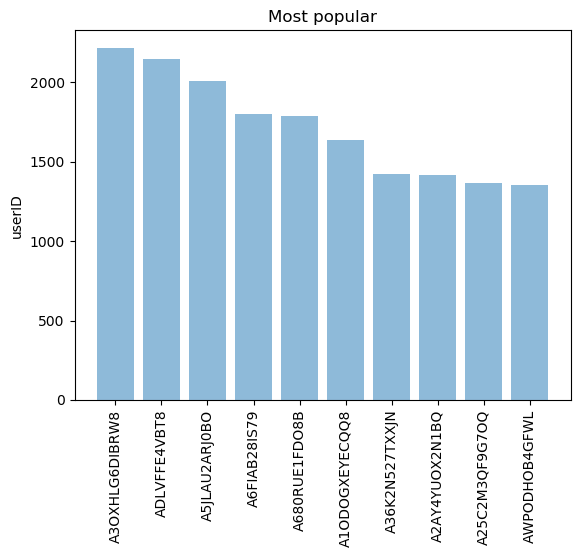

In [12]:
popular = rdf[['userID','ratings']].groupby('userID').sum().reset_index()
popular_10 = popular.sort_values('ratings', ascending=False).head(n=10)
import matplotlib.pyplot as plt; plt.rcdefaults()
 
objects = (list(popular_10['userID']))
y_pos = np.arange(len(objects))
performance = list(popular_10['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userID')
plt.title('Most popular')
 
plt.show()

In [13]:
rdf.userID.value_counts()


A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1Q3B5DQ3S8CXQ      1
AOZM8JC9HM4TU       1
A2P7A4SS64VIOB      1
A1ZVN4GN5Y7HJX      1
A35W0HTDQ4JPJY      1
Name: userID, Length: 4201696, dtype: int64

In [15]:
avg_rating = rdf.groupby('productID').sum() / rdf.groupby('productID').count()

In [17]:
avg_rating.drop('userID', axis=1,inplace =True)


In [18]:
print ('Top 5 highly rated products \n',avg_rating.nlargest(5,'ratings'))

Top 5 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0


# 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [19]:
userID = rdf.groupby('userID').count()

In [21]:
top_user = userID[userID['ratings'] >= 50].index

In [22]:
topuser_ratings_df = rdf[rdf['userID'].isin(top_user)]

In [23]:
topuser_ratings_df.head()


,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [24]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0


In [ ]:
#keeping data which have more than 50  user ratings

In [25]:
prodID = rdf.groupby('productID').count()


In [26]:
top_prod = prodID[prodID['ratings'] >= 50].index

In [27]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]

In [28]:
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


# 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [32]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=1)

# Build Popularity Recommender model.

In [33]:
train_data_grouped = train_data.groupby('productID').mean().reset_index()

In [34]:
train_data_grouped.head()


,productID,ratings
0,0972683275,4.500000
1,1400501466,3.333333
2,1400501776,5.000000
3,1400532620,3.000000
4,1400532655,3.600000


In [35]:
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending=False)

In [36]:
train_data_sort.head()


,productID,ratings
14903,B00L3YHF6O,5.0
14901,B00KINSDK8,5.0
14897,B00K4VQZCM,5.0
14896,B00K0OBEE2,5.0
14892,B00JLADOGW,5.0


In [37]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)


productID
B0088CJT4U    144
B003ES5ZUU    124
B000N99BBC    116
B007WTAJTO    114
B00829TIEK    110
B00829THK0    101
B008DWCRQW     93
B002R5AM7C     89
B002V88HFE     84
B00834SJNA     82
Name: ratings, dtype: int64

In [38]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())

In [39]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())


In [40]:
ratings_mean_count.head()


,ratings,rating_counts
productID,,
0972683275,4.500000,2
1400501466,3.333333,6
1400501776,5.000000,1
1400532620,3.000000,2
1400532655,3.600000,5


In [41]:
pdf = test_data[['userID', 'productID', 'ratings']]

In [42]:
pdf.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)


In [43]:
pdf = pdf.merge(train_data_sort, left_on='productID', right_on = 'productID')


In [44]:
pdf.head()

,userID,productID,true_ratings,ratings
0,A2HKUM9OEBQKDW,B007SM7O2U,5.0,4.5
1,A1CMD08Z49PGKQ,B007SM7O2U,5.0,4.5
2,A1V5TRJXTI6F01,B007SM7O2U,5.0,4.5
3,A35HNL2VEDK9Z1,B00BOZ1Y46,5.0,4.8
4,A376OJHLE6SU9Q,B006TF37H8,5.0,4.5


In [45]:
pdf.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

In [46]:
pdf.head()

,userID,productID,true_ratings,predicted_ratings
0,A2HKUM9OEBQKDW,B007SM7O2U,5.0,4.5
1,A1CMD08Z49PGKQ,B007SM7O2U,5.0,4.5
2,A1V5TRJXTI6F01,B007SM7O2U,5.0,4.5
3,A35HNL2VEDK9Z1,B00BOZ1Y46,5.0,4.8
4,A376OJHLE6SU9Q,B006TF37H8,5.0,4.5


In [47]:

import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pdf['true_ratings'], pdf['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.077780018350359


#  5. Build Collaborative Filtering model.

In [50]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [51]:
reader = Reader(rating_scale=(0.5, 5.0))


In [52]:
data = Dataset.load_from_df(top_ratings_df[['userID', 'productID', 'ratings']],reader)


In [ ]:
#splitting data to train and test

In [54]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=1)

In [55]:
type(trainset)


surprise.trainset.Trainset

In [57]:
#applying SVD

from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

In [58]:
#applying KNN
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


# 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [59]:
MSE = metric.mean_squared_error(pdf['true_ratings'], pdf['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.077780018350359


In [60]:
# Evaluation on test set with KNN
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A2GKMXRLI7KLFP', iid='B002TNRTSC', r_ui=4.0, est=4.645161290322581, details={'actual_k': 0, 'was_impossible': False})

In [61]:
accuracy.rmse(test_pred) 


RMSE: 0.9856


0.9856027485256446

In [62]:
#evaluation using SVD
test_pred = svd_model.test(testset)


In [63]:
accuracy.rmse(test_pred)

RMSE: 0.9537


0.9537026730448839

In [ ]:
#The RMSE value for Collaborative Filtering model, byKNN WithMeans is 0.9856 and SVD is 0.9537.

In [ ]:
#Parameter  tuning

In [68]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [69]:
gs.fit(data)
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [70]:
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8566


0.8565929661227207

In [ ]:
#after parameter tuning RMSE is 0.856

# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [71]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # sorting the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [72]:
top_n = get_top_n(test_pred, n=5)

In [73]:
#recommended items according to user id
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2GKMXRLI7KLFP ['B00066FH1U', 'B000JMJWV2', 'B003NE5JCE', 'B00305N48C', 'B001DFS49U']
A2E1EFNIZL2FVA ['B0082E9K7U', 'B005A0B3FG', 'B0064EL2DK', 'B0058FAYPI', 'B00HRQB28Y']
A3BY5KCNQZXV5U ['B003VAHYNC', 'B003XM73P2', 'B003L139HG', 'B007PTCFFW', 'B002ISXBFI']
A14NA0W8ESGDSI ['B001TH7GSW', 'B004ELA0SS', 'B002FB684E', 'B00008W2LC', 'B001AGM2VI']
A8FKL1DHTHC12 ['B005LFT3GG', 'B00HYAL84G', 'B007PE3FC4', 'B00139W0XM', 'B004LTEUDO']
A8X478DM3KAWM ['B001212ELY', 'B000N99BBC', 'B004FLJVXM', 'B009PBUK9Q', 'B000FITKK8']
A1G650TTTHEAL5 ['B004IK2EAW', 'B00E1HIVG8', 'B009N1RV9U', 'B00FSA8VQ2', 'B00AYQ433U']
A2J0IBS4PFRO2C ['B002TMRZOQ', 'B003MVZ60S', 'B000A5TAT2', 'B00FG38L16', 'B003JOCR14']
AN81JUYW2SL24 ['B000N99BBC', 'B009NHWVIA', 'B007WTAJTO', 'B000E65HXA', 'B004286VMW']
A3B20R4ZAH0Y2Y ['B000NP3DJW', 'B00008I9K8', 'B001XURPQI', 'B002K9IHGI', 'B00DR6DQZA']
AKBVYIIHWI04B ['B009SYZ8OC', 'B00461E7JE', 'B00E055H5O', 'B00609B3J2', 'B004DBD4TG']
A1QOIHVQC5XWCJ ['B002VFFA5M', 'B007BY3PBE', 'B00829THK0', 

# 8. Summarise your insights.

We have built the Popularity Recommender model and found the RMSE value for Popularity Recommender model as 1.078

The RMSE value for Collaborative Filtering model, byKNN WithMeans is 0.9856 and SVD is 0.9537. 
After parameter tuning of SVD it is 0.856.


The RMSE value for Popularity Recommender model is 1.077780018350359.
The RMSE value for Collaborative Filtering model, byKNN WithMeans is 0.9856 and SVD is 0.9537.

Between RMSE of Popularity and Collaborative filtering , Collaborative fitering is better.








